In [81]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd


# Data paths
Game_Logs_Quarterback_path = "../Resources/Game_Logs_Quarterback.csv"
Game_Logs_Runningback_path = "../Resources/Game_Logs_Runningback.csv"
Game_Logs_Wide_Receiver_and_Tight_End_path = "../Resources/Game_Logs_Wide_Receiver_and_Tight_End.csv"

# Reading relevant datasets
QB_data = pd.read_csv(Game_Logs_Quarterback_path)
Runningback_data = pd.read_csv(Game_Logs_Runningback_path)
WR_Tightend_data = pd.read_csv(Game_Logs_Wide_Receiver_and_Tight_End_path)

# Merging Datasets
Rushing_data = pd.merge(QB_data, Runningback_data, how="left")
Rushing_data = pd.merge(Rushing_data, WR_Tightend_data, how="left")

# Keeping relevant columns
Rushing_data_reduced = Rushing_data.loc[:, ["Player Id", "Year", "Outcome", "Score", "Rushing Attempts", 
                                            "Rushing Yards", "Yards Per Carry", "Rushing TDs"]]

# Keeping only years after 2000
Rushing_data_reduced_clean = Rushing_data_reduced.loc[(Rushing_data_reduced["Year"] >= 2000)]

# Formatting score to only have player's team's score
Rushing_data_reduced_clean[["Score", "to", "Opponent Score"]] = Rushing_data_reduced_clean["Score"].str.split(expand=True)

# Keeping relevant columns
Rushing_data_reduced_clean = Rushing_data_reduced_clean.loc[:, ["Player Id", "Year", "Outcome", "Score", "Rushing Attempts", 
                                                                "Rushing Yards", "Yards Per Carry", "Rushing TDs"]]
# Removing any empty values in Rushing Yards
Rushing_data_clean = Rushing_data_reduced_clean.loc[(Rushing_data_reduced_clean["Rushing Yards"] != "--")]

# Casting score column and rushing yards column from string to int
Rushing_data_clean["Score"] = Rushing_data_clean["Score"].astype(int)
Rushing_data_clean["Rushing Yards"] = Rushing_data_clean["Rushing Yards"].astype(int)

# Groupby on Player Id
Rushing_yards_group = Rushing_data_clean.groupby(["Player Id"]).mean()

Rushing_yards_group.head()
                                                    


C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Chris\AppData\Local\Temp/ipykernel_15196/3884235922.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Rushing_data_clean["Score"] = Rushing_data_clean["Score"].astype(int)
C:\Users\Chris\AppData\Local\Temp/ipykernel_15196/3884235922.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

,Year,Score,Rushing Yards
Player Id,,,
a.j.feeley/2504566,2005.133333,18.933333,3.733333
aaronrodgers/2506363,2011.547619,26.898810,18.119048
adamweber/2530553,2012.000000,13.000000,8.000000
ajmccarron/2543497,2015.181818,20.363636,6.727273
alexsmith/2506340,2011.552632,22.236842,16.388158


The r-squared is: 0.008913680180956543


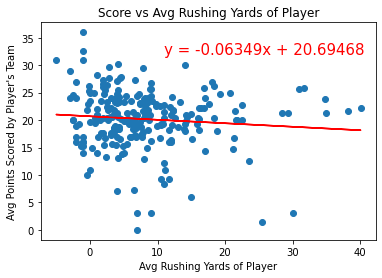

In [82]:
x_values = Rushing_yards_group["Rushing Yards"]
y_values = Rushing_yards_group["Score"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(11,32),fontsize=15,color="red")
plt.title('Score vs Avg Rushing Yards of Player')
plt.xlabel('Avg Rushing Yards of Player')
plt.ylabel("Avg Points Scored by Player's Team")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00272905707688805


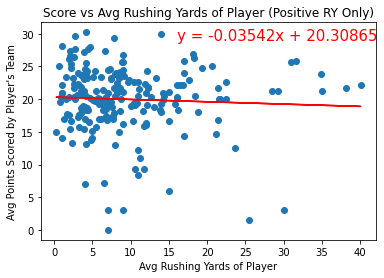

In [80]:
Rushing_yards_group_positive = Rushing_yards_group.loc[(Rushing_yards_group["Rushing Yards"] > 0)]

x_values = Rushing_yards_group_positive["Rushing Yards"]
y_values = Rushing_yards_group_positive["Score"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,29),fontsize=15,color="red")
plt.title('Score vs Avg Rushing Yards of Player (Positive RY Only)')
plt.xlabel('Avg Rushing Yards of Player')
plt.ylabel("Avg Points Scored by Player's Team")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [83]:
'''
With an R^2 value of 0.008 and 0.003, there is a very weak correlation between average score and average rushing yards. 
The regression line shows a slight negative correlation.
''' 


'\nWith an R^2 value of 0.008 and 0.003, there is a very weak correlation between average score and average rushing yards. \nThe regression line shows a slight negative correlation.\n'